In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVR

In [50]:
flight_train  = pd.read_excel('Flight/Data_Train.xlsx')
flight_test = pd.read_excel('Flight/Test_set.xlsx')

In [51]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [52]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [53]:
flight_train.shape,flight_test.shape

((10683, 11), (2671, 10))

In [54]:
flight_train.info(),flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_o

(None, None)

In [55]:
#checking the null values in a train dataset
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [56]:
#checking the null values in a test dataset
flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [57]:
flight_train = flight_train.dropna()

In [58]:
flight_train['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [59]:
#inserting the most repeated route column value in null valued row
flight_train.loc[9039,'Route']='DEL → BOM → COK'
flight_train.loc[9039,'Total_Stops']='1 stop'

In [60]:
flight_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

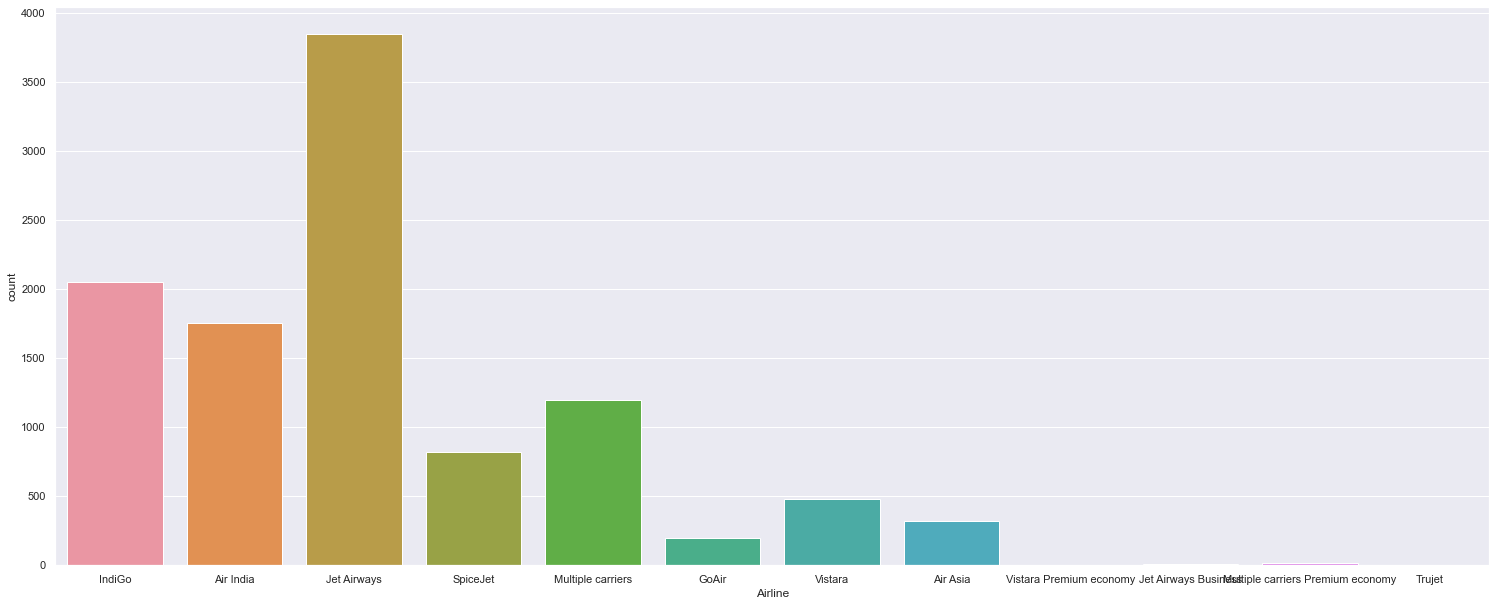

In [61]:
# COunt of various Airlines 
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(flight_train['Airline'])

In [62]:
flight_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [63]:
pd.crosstab(flight_train['Source'],flight_train['Destination'])


Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,932
Chennai,0,0,0,0,381,0
Delhi,0,4536,0,0,0,0
Kolkata,2871,0,0,0,0,0
Mumbai,0,0,0,697,0,0


In [64]:
#row of the entire dataset where the price is maximum
flight_train.loc[flight_train['Price'].idxmax()]

Airline            Jet Airways Business
Date_of_Journey              01/03/2019
Source                         Banglore
Destination                   New Delhi
Route                   BLR → BOM → DEL
Dep_Time                          05:45
Arrival_Time                      11:25
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          Business class
Price                             79512
Name: 2924, dtype: object

In [65]:
#row of the entire dataset where the price is miniimum
flight_train.loc[flight_train['Price'].idxmin()]


Airline                SpiceJet
Date_of_Journey      21/03/2019
Source                   Mumbai
Destination           Hyderabad
Route                 BOM → HYD
Dep_Time                  22:45
Arrival_Time       00:10 22 Mar
Duration                 1h 25m
Total_Stops            non-stop
Additional_Info         No info
Price                      1759
Name: 4066, dtype: object

In [66]:
flight_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [67]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

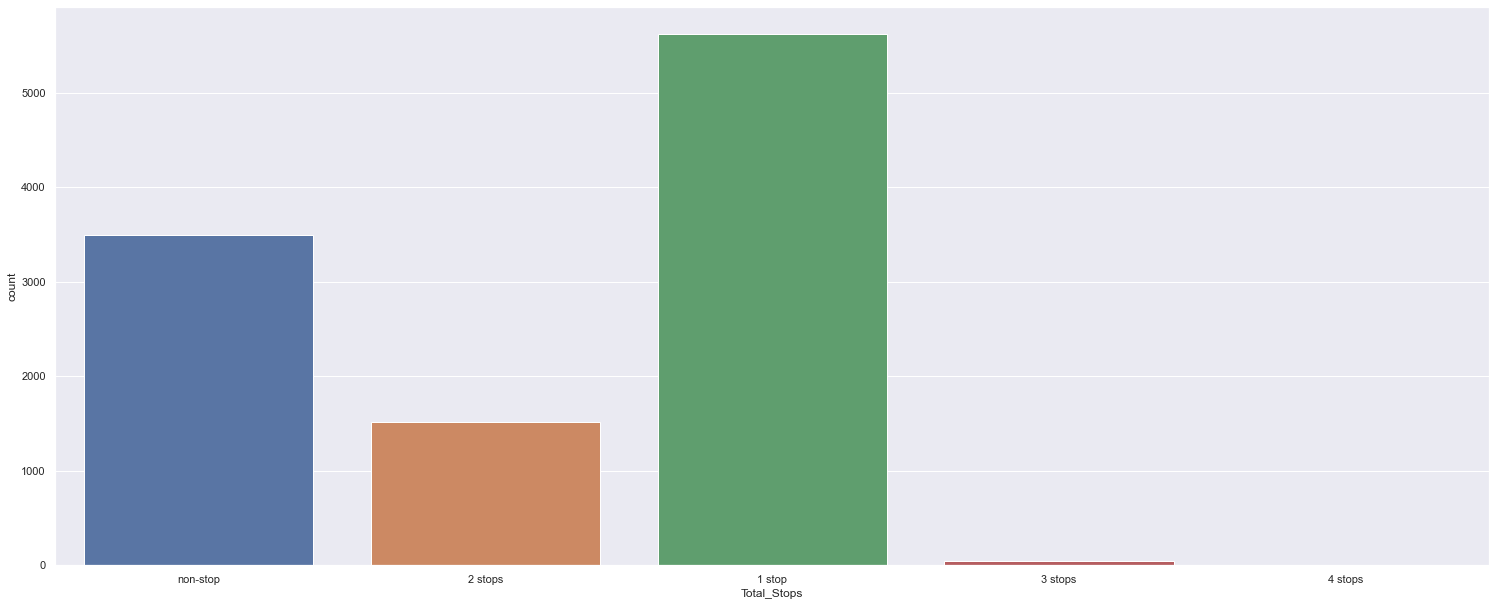

In [68]:
#Total Stops count
sns.countplot(flight_train['Total_Stops'])

In [69]:
# Taking the month from the flight date in train set 
flight_train['Date_of_Journey'] = pd.to_datetime(flight_train['Date_of_Journey'])
flight_train['Month_of_Journey'] = flight_train['Date_of_Journey'].dt.month
flight_train['Day_of_Journey'] = flight_train['Date_of_Journey'].dt.day

In [70]:
#COunt in each month 
flight_train['Month_of_Journey'].value_counts()


6.0     2535
3.0     2211
5.0     2074
9.0     1406
1.0     1075
12.0     957
4.0      424
Name: Month_of_Journey, dtype: int64

In [71]:
# Taking the month from the flight date in test set 
flight_test['Date_of_Journey'] = pd.to_datetime(flight_test['Date_of_Journey'])
flight_test['Month_of_Journey'] = flight_test['Date_of_Journey'].dt.month
flight_test['Day_of_Journey'] = flight_test['Date_of_Journey'].dt.day

In [73]:
# Removing Null values 
flight_train = flight_train[flight_train['Duration'].notnull()]
flight_test = flight_test[flight_test['Duration'].notnull()]

In [74]:
#preproceesing the duration
duration = list(flight_train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_train['Duration_hours'] = dur_hours
flight_train['Duration_minutes'] =dur_minutes

In [75]:
#Similary in test set
duration = list(flight_test['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_test['Duration_hours'] = dur_hours
flight_test['Duration_minutes'] =dur_minutes

In [76]:
#droping the duration column in train dataset
flight_train = flight_train.drop(labels='Duration',axis=1)

In [77]:
#droping the duration column in test dataset
flight_test = flight_test.drop(labels='Duration',axis=1)

In [78]:
#featuring the departure_time and arrival_time in train set 
flight_train['Dep_Time'] = pd.to_datetime(flight_train['Dep_Time'])
flight_train['Arrival_Time'] = pd.to_datetime(flight_train['Arrival_Time'])
flight_train['Dep_Time_hours'] = flight_train['Dep_Time'].dt.hour
flight_train['Dep_Time_minutes'] = flight_train['Dep_Time'].dt.minute
flight_train['Arr_Time_hours'] = flight_train['Arrival_Time'].dt.hour
flight_train['Arr_Time_minutes'] = flight_train['Arrival_Time'].dt.minute

In [79]:
#featuring the departure_time and arrival_time in test set 
flight_test['Dep_Time'] = pd.to_datetime(flight_test['Dep_Time'])
flight_test['Arrival_Time'] = pd.to_datetime(flight_test['Arrival_Time'])
flight_test['Dep_Time_hours'] = flight_test['Dep_Time'].dt.hour
flight_test['Dep_Time_minutes'] = flight_test['Dep_Time'].dt.minute
flight_test['Arr_Time_hours'] = flight_test['Arrival_Time'].dt.hour
flight_test['Arr_Time_minutes'] = flight_test['Arrival_Time'].dt.minute


In [80]:
#dropping the orginal columns
flight_train = flight_train.drop(labels={'Dep_Time','Arrival_Time'},axis=1)

In [81]:
flight_test = flight_test.drop(labels={'Dep_Time','Arrival_Time'},axis=1)

In [83]:
#extracting the weekday name in train set 
flight_train['Date_of_journey_weekname'] = flight_train['Date_of_Journey'].dt.day_name()
flight_train['Is_weekend'] = np.where(flight_train['Date_of_journey_weekname'].isin(['Sunday','Saturday']),1,0)

In [85]:
#extracting the weekday name in test set 
flight_test['Date_of_journey_weekname'] = flight_test['Date_of_Journey'].dt.day_name()
flight_test['Is_weekend'] = np.where(flight_test['Date_of_journey_weekname'].isin(['Sunday','Saturday']),1,0)

In [86]:
#dropping the date of journey column in train data
flight_train = flight_train.drop(labels='Date_of_Journey',axis=1)

In [87]:
#dropping the date of journey column in test data
flight_test = flight_test.drop(labels='Date_of_Journey',axis=1)

In [88]:
# look at new trainig set
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes,Date_of_journey_weekname,Is_weekend
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,3.0,24.0,2,50,22,20,1,10,Sunday,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1.0,5.0,7,25,5,50,13,15,Saturday,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9.0,6.0,19,0,9,25,4,25,Friday,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12.0,5.0,5,25,18,5,23,30,Thursday,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1.0,3.0,4,45,16,50,21,35,Thursday,0


In [89]:
flight_test.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes,Date_of_journey_weekname,Is_weekend
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25,Thursday,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,6,20,10,20,Thursday,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,23,45,19,15,19,0,Tuesday,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,13,0,8,0,21,0,Tuesday,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,2,50,23,55,2,45,Monday,0


In [90]:
flight_train_orginal = flight_train.copy()
flight_test_orginal  = flight_test.copy()


In [91]:
# encoding the data

In [92]:
#using the label encoder
le1 = LabelEncoder()
le2 = LabelEncoder()

In [93]:
#dependent varaible
Y_Train = flight_train.iloc[:,6].values

In [94]:
#independent varaibles
X_Train = flight_train.iloc[:,flight_train.columns!='Price'].values


In [95]:
X_Train.shape


(10682, 16)

In [96]:
# encoding the train data

X_Train[:,0] = le1.fit_transform(X_Train[:,0])

X_Train[:,1] = le1.fit_transform(X_Train[:,1])

X_Train[:,2] = le1.fit_transform(X_Train[:,2])

X_Train[:,3] = le1.fit_transform(X_Train[:,3])

X_Train[:,4] = le1.fit_transform(X_Train[:,4])

X_Train[:,5] = le1.fit_transform(X_Train[:,5])

X_Train[:,14] = le1.fit_transform(X_Train[:,14])

In [97]:
# encoding the test data

X_Test = flight_test.iloc[:,:].values

X_Test[:,0] = le2.fit_transform(X_Test[:,0])

X_Test[:,1] = le2.fit_transform(X_Test[:,1])

X_Test[:,2] = le2.fit_transform(X_Test[:,2])

X_Test[:,3] = le2.fit_transform(X_Test[:,3])

X_Test[:,4] = le2.fit_transform(X_Test[:,4])

X_Test[:,5] = le2.fit_transform(X_Test[:,5])

X_Test[:,14] =  le2.fit_transform(X_Test[:,14])

In [98]:
# Scaling i.e Standar Scaler

In [99]:
sc = StandardScaler()


In [100]:
X_Train = sc.fit_transform(X_Train)


In [101]:
X_Test = sc.transform(X_Test)


In [102]:
Y_Train = Y_Train.reshape((len(Y_Train)),1)


In [103]:
Y_Train = sc.fit_transform(Y_Train)


In [104]:
Y_Train = Y_Train.ravel()


In [108]:
pd.DataFrame(X_Train).head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.410805,-1.658359,2.416534,-1.547082,1.407210,0.499921,-0.848450,1.285536,-0.970614,1.279041,1.654154,-0.234950,-1.800436,-0.890014,0.001596,1.927723
1,-1.261152,0.890014,-0.973812,0.249946,-0.253703,0.499921,-1.517909,-0.872724,-0.381999,-0.196319,-1.303113,1.363607,-0.050909,-0.587094,-0.485613,1.927723
2,0.014369,0.040556,-0.295743,1.175687,-0.253703,0.499921,1.159928,-0.759131,1.030677,-1.671678,-0.607286,0.031476,-1.363054,0.018745,-1.460032,-0.518747
3,-0.410805,0.890014,-0.973812,0.440539,-0.807341,0.499921,2.164117,-0.872724,-0.617445,-0.196319,0.958326,-1.034229,1.407030,0.321664,0.488806,-0.518747
4,-0.410805,-1.658359,2.416534,-1.247577,-0.807341,0.499921,-1.517909,-1.099909,-0.735168,0.983969,0.610412,1.363607,1.115442,0.624584,0.488806,-0.518747
5,1.715063,0.890014,-0.973812,-0.294608,1.407210,0.499921,0.155739,1.285536,-0.970614,-0.196319,-0.607286,-1.300655,-0.342497,0.018745,-0.972823,-0.518747
6,0.014369,-1.658359,2.416534,-1.901042,-0.807341,-1.970848,2.164117,-1.099909,0.559785,0.098753,0.958326,1.630034,-0.488291,0.018745,0.976015,-0.518747
7,0.014369,-1.658359,2.416534,-1.901042,-0.807341,0.499921,-1.517909,-1.099909,1.266123,-1.376606,-0.781243,-1.300655,-1.217261,-1.192933,0.488806,-0.518747
8,0.014369,-1.658359,2.416534,-1.901042,-0.807341,-1.970848,2.164117,-1.099909,1.737015,0.098753,-0.781243,1.630034,-0.488291,0.018745,0.976015,-0.518747
9,0.864716,0.040556,-0.295743,0.794499,-0.807341,0.499921,-0.178990,1.626314,-0.381999,1.279041,-0.259372,0.031476,0.823854,-0.587094,-0.972823,-0.518747


In [109]:
pd.DataFrame(Y_Train).head(10)

,0
0,-1.125535
1,-0.309068
2,1.039783
3,-0.622209
4,0.914006
5,-1.130739
6,0.433668
7,2.858780
8,0.433668
9,-0.100234


In [110]:
# Random forest Regressor
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [111]:
rf_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
         'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [112]:
rf =RandomForestRegressor()


In [113]:
# Grid Search 

In [114]:
best_rf_tree=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,n_jobs=-1,cv=3,scoring='neg_mean_squared_error')


In [115]:
best_rf_tree.fit(X_Train,Y_Train)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [116]:
rf_predict =sc.inverse_transform( best_rf_tree.predict(X_Test))

In [126]:
rf_predict


array([10220.62209149,  5322.84735794, 14155.04232143, ...,
       15484.47921436, 12697.72971667,  8666.30509416])

In [127]:
#to exporting into excel sheet
pd.DataFrame(np.around(rf_predict),columns=['Price']).to_excel('Output_grid.xlsx',index=False)

In [128]:
#Svr

In [129]:
svr = SVR(kernel='rbf')


In [130]:
svr.fit(X_Train,Y_Train)


SVR()

In [131]:
svr_predict = svr.predict(X_Test)


In [132]:
svr_predict


array([ 0.49295052, -0.44100664,  0.24602534, ...,  0.69779816,
        0.08385349,  0.41125614])

In [133]:
svr_predict_orginal = sc.inverse_transform(svr_predict)


In [134]:
pd.DataFrame(svr_predict_orginal,columns=['Price']).to_excel('Output1_svr.xlsx',index=False)


In [ ]:
#Thank you :) ...